In [1]:
import matplotlib.pyplot as plt

In [2]:
def update(t, delta_t, current_val, f_prime):
    return current_val + (delta_t * f_prime(current_val))

In [3]:
#define derivatives
def s_dot(beta, I, N):
    return lambda S : -1 * beta * S * I * (1 / N)

def i_dot(beta, gamma, S, N):
    return lambda I : (beta * S * I * (1 / N)) - (gamma * I)

def r_dot(gamma, I):
    return lambda _ : gamma * I

In [4]:
#create solver
def solve(init_conditions, N, delta_t, max_time, beta, gamma):
    #set up experiment loop
    t = [init_conditions[0]]
    S =[init_conditions[1]]
    I = [init_conditions[2]]
    R = [init_conditions[3]]
    
    idx=0
    
    while t[idx] < max_time:
        #create derivatives
        s_update = s_dot(beta, I[idx], N)
        i_update = i_dot(beta, gamma, S[idx], N)
        r_update = r_dot(gamma, I[idx])
        
        #update S, I, R
        S.append(update(t[idx], delta_t, S[idx], s_update))
        I.append(update(t[idx], delta_t, I[idx], i_update))
        R.append(update(t[idx], delta_t, R[idx], r_update))
    
        #upate time
        t.append(t[idx] + delta_t)
        idx += 1

    return t, S, I, R

## Problem 1

In [24]:
#create plotting function
def plot(S, I, R, beta, gamma, t, save=True, N=1000, loc='right'):
    plt.plot(t, S, color='blue', label='S Morgan')
    plt.plot(t, I, color='red', label='I Morgan')
    plt.plot(t, R, color='black', label='R Morgan')
    
    plt.xlabel('Time')
    plt.ylabel('People')

    plt.xlim([0,t[-1]])
    plt.ylim([0,N+50])
    
    plt.title(rf'SIR model outputs for $\beta = {beta}$, $\gamma = {gamma}$')
    plt.legend(loc=loc)

    if save:
        plt.savefig(f'sir_beta={beta}_gamma={gamma}.jpg', dpi=200, bbox_inches='tight')
    plt.show()

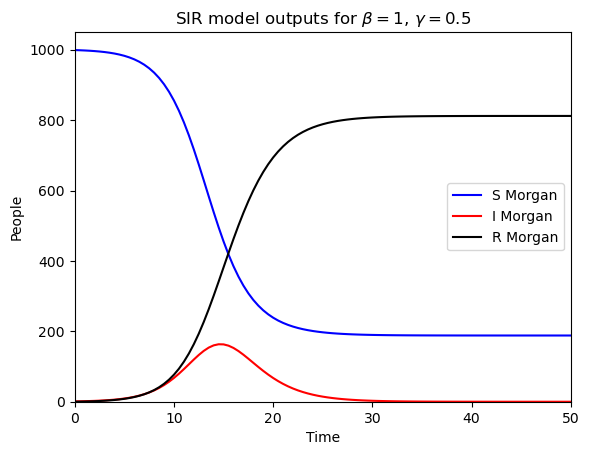

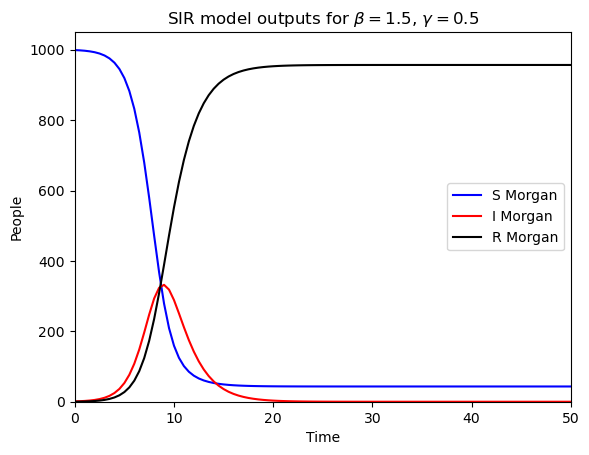

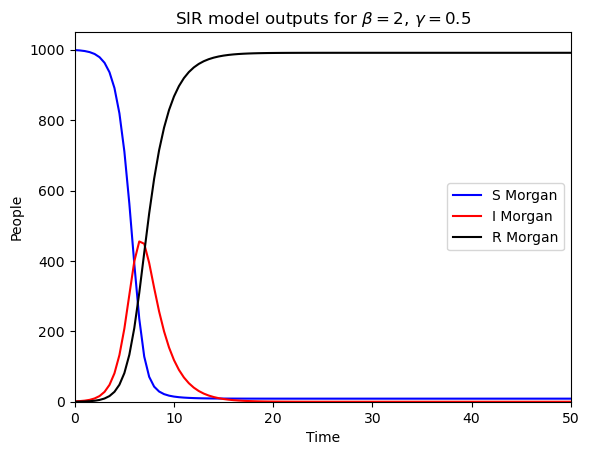

In [19]:
#initial conditions
t_init = 0
delta_t = 0.5
max_time = 50

N = 1000
S_init = 999
I_init = 1
R_init = N - I_init - S_init

init_conditions = [t_init, S_init, I_init, R_init]

#solve loop
betas = [1, 1.5, 2]
gamma = 0.5

for beta in betas:
    t, S, I, R = solve(init_conditions, N, delta_t, max_time, beta, gamma)
    plot(S,I,R, beta, gamma, t, N=N, save=False)

## Problem 3

In [123]:
from math import exp
from scipy.optimize import fsolve

In [198]:
def f(r_infty):
    return r_infty

def g(r_infty, R=0.9):
    test = exp(-1 * R * r_infty)
    return 1 - test

def h(r, R=0.9):
    return f(r) - g(r, R)

#auxilliary function to make plots prettier
def create_rvals(root, buffer=0.01, step=0.001):
    stop = root + buffer
    return [i * step for i in range(int(stop / step) + 1)]

In [208]:
def plot(g_vals, f_vals, r_infty, R, root):
    plt.plot(r_infty, f_vals, color='black', label=r'$f$')
    plt.plot(r_infty, g_vals, color='red', label=r'$g$')
    plt.scatter(root, root, facecolors='none', edgecolors='blue')

    plt.xlabel(r'$r_\infty$')
    
    plt.legend(loc='best')

    plt.title(rf'$R_0 = {R}$, $r_\infty = {root[0]:.3f}$')

    plt.savefig(f'R0={R}.jpg', dpi=200, bbox_inches='tight')
    plt.show()

C:\Users\mebli\AppData\Local\Temp\ipykernel_22380\3009265103.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test = exp(-1 * R * r_infty)
C:\Users\mebli\AppData\Local\Temp\ipykernel_22380\3009265103.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [i * step for i in range(int(stop / step) + 1)]


[3.33066907e-16]


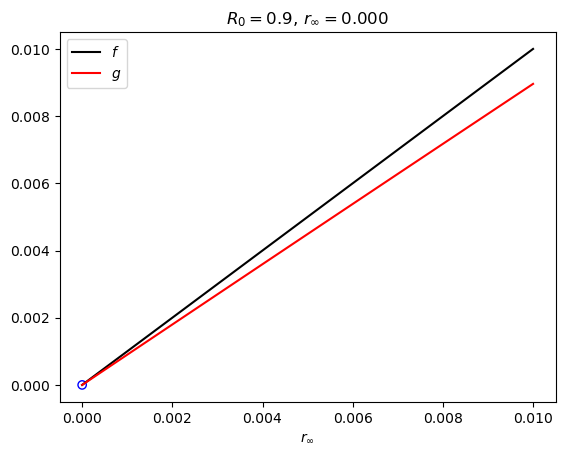

C:\Users\mebli\AppData\Local\Temp\ipykernel_22380\3009265103.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test = exp(-1 * R * r_infty)
C:\Users\mebli\AppData\Local\Temp\ipykernel_22380\3009265103.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [i * step for i in range(int(stop / step) + 1)]


[6.76925438e-09]


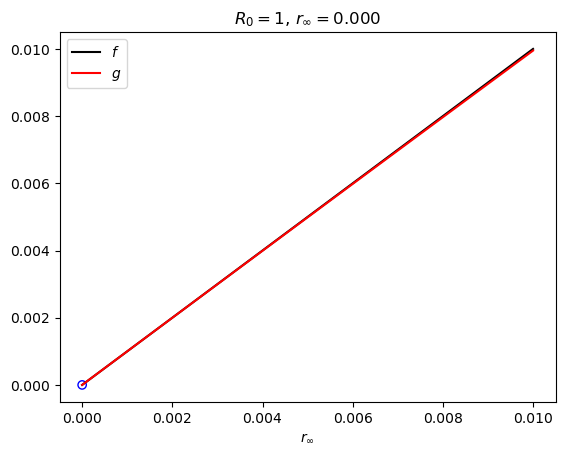

C:\Users\mebli\AppData\Local\Temp\ipykernel_22380\3009265103.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test = exp(-1 * R * r_infty)
C:\Users\mebli\AppData\Local\Temp\ipykernel_22380\3009265103.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [i * step for i in range(int(stop / step) + 1)]


[0.17613414]


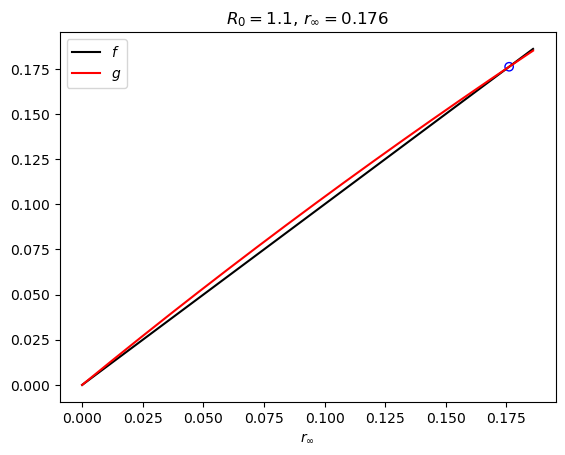

C:\Users\mebli\AppData\Local\Temp\ipykernel_22380\3009265103.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test = exp(-1 * R * r_infty)
C:\Users\mebli\AppData\Local\Temp\ipykernel_22380\3009265103.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [i * step for i in range(int(stop / step) + 1)]


[0.31369833]


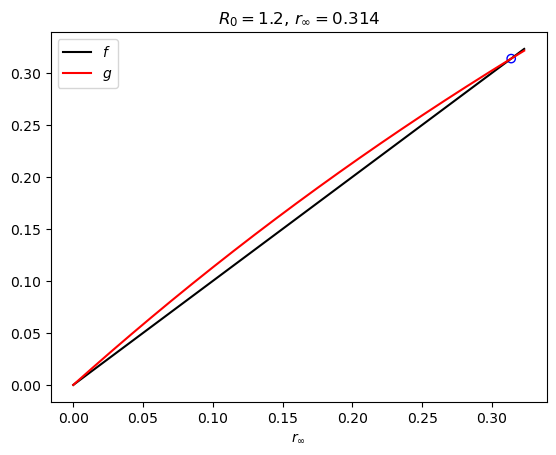

In [210]:
R_vals = [0.9, 1, 1.1, 1.2]


for R in R_vals:
    root = fsolve(h, 1, args=(R))
    print(root)
    
    r_infty = create_rvals(root)
    f_vals = [f(r) for r in r_infty]
    g_vals = [g(r, R) for r in r_infty]
    
    plot(g_vals, f_vals, r_infty, R, root)

In [216]:
#initial conditions
t_init = 0
delta_t = 0.5
max_time = 50

N = 1000
S_init = 999
I_init = 1
R_init = N - I_init - S_init

init_conditions = [t_init, S_init, I_init, R_init]

beta = 1
gamma = 0.5
R = beta / gamma

#figure out r infty
r_infty = fsolve(h, 1, args=(R))[0]
print(f'{r_infty:.3f}')

#solve
t, S, I, R = solve(init_conditions, N, delta_t, max_time, beta, gamma)

0.797


C:\Users\mebli\AppData\Local\Temp\ipykernel_22380\3009265103.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test = exp(-1 * R * r_infty)


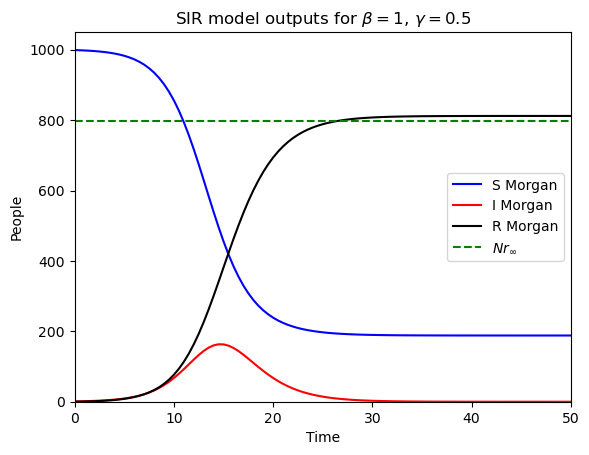

In [229]:
#plot result
plt.plot(t, S, color='blue', label='S Morgan')
plt.plot(t, I, color='red', label='I Morgan')
plt.plot(t, R, color='black', label='R Morgan')
plt.hlines(r_infty * N, 0, max_time, color='green', linestyle='dashed', label=r'$Nr_\infty$')

plt.xlabel('Time')
plt.ylabel('People')

plt.xlim([0,t[-1]])
plt.ylim([0,N+50])

plt.title(rf'SIR model outputs for $\beta = {beta}$, $\gamma = {gamma}$')
plt.legend(loc='right')

plt.savefig('sir_with_rinfty.jpg', dpi=250, bbox_inches='tight')
plt.show()

## Problem 4

In [82]:
#set up some initial conditions
t_init = 0
delta_t = 0.5
max_time = 30000

N = 10e6
epsilon = 1 / N
I_init = 1 + epsilon

#fix gamma and vary beta like above
betas = [2, 1.5, 1]
gamma = 0.5

#solve loop
all_I = []
for beta in betas:
    #need s < 1 / r0
    S_init = N * (gamma / beta)
    R_init = N - I_init - S_init

    init_conditions = [t_init, S_init, I_init, R_init]
    print(N, S_init, I_init, R_init)
    
    t, S, I, R = solve(init_conditions, N, delta_t, max_time, beta, gamma)
    all_I.append(I)

10000000.0 2500000.0 1.0000001 7499998.999999899
10000000.0 3333333.333333333 1.0000001 6666665.666666566
10000000.0 5000000.0 1.0000001 4999998.999999899


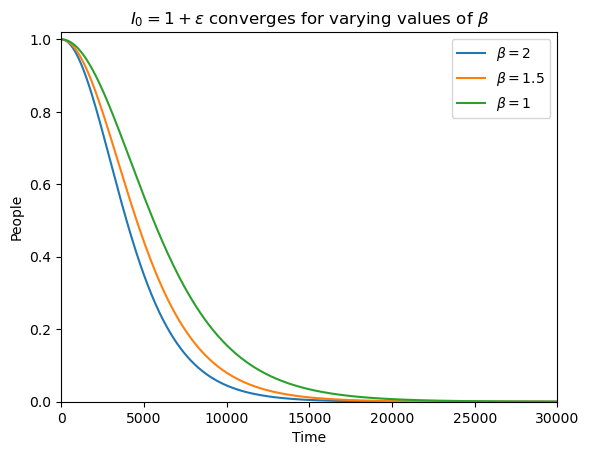

In [100]:
for beta, I in zip(betas, all_I):
    plt.plot(t, I, label=rf'$\beta = {beta}$')

plt.ylim([0, all_I[0][0] + 0.02])
plt.xlim([0, t[-1]])

plt.xlabel('Time')
plt.ylabel('People')

plt.title(r'$I_0 = 1 + \epsilon$ converges for varying values of $\beta$')

plt.legend(loc='best')

plt.savefig('sir_stablity.jpg', dpi=200, bbox_inches='tight')
plt.show()